## Bernuolli Distribution

In [1]:
#Bernuolli distribution 
'''
Bernuolli distribution leads to several probability distributions 
1. The Binomial distribution 
2. Geometric distribution
3. The Negative binomial distribution
'''

## We will take a look at the coin toss 

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions

2023-01-11 22:33:41.375379: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 22:33:41.375417: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
coin_toss = tfd.Bernoulli(0.5,name="coin_toss")

2023-01-11 22:33:49.707243: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-11 22:33:49.707289: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-11 22:33:49.707321: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2023-01-11 22:33:49.710078: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
coin_toss

<tfp.distributions.Bernoulli 'coin_toss' batch_shape=[] event_shape=[] dtype=int32>

In [4]:
coin_toss.sample()

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [5]:
coin_toss_data = coin_toss.sample(100)

In [6]:
probability_of_data_points = coin_toss.prob(coin_toss_data)


In [7]:
#computing the likelihood - use product_reduce

#Likelihood of dataset - coin_toss_data
likelihood = tf.cast(tf.reduce_prod(probability_of_data_points),"float")

In [8]:
likelihood

<tf.Tensor: shape=(), dtype=float32, numpy=1.4437895e-29>

In [9]:
'''
MLE of Bernuolli can very easily be derived. MLE is used to estimate the parameter of the distribution. 
MLE of bernuolli is mean of the dataset.
'''

'\nMLE of Bernuolli can very easily be derived. MLE is used to estimate the parameter of the distribution. \nMLE of bernuolli is mean of the dataset.\n'

## MLE using closed form approach

In [10]:
#let use the coin_toss 
#MLE  - Max likelihood estimation 

mle = tf.reduce_mean(tf.cast(coin_toss.sample(1000),"float"))
print(f"The MLE of Bernoulli distribution is {mle}")

The MLE of Bernoulli distribution is 0.6079999804496765


# MLE using Gradient Descent based approach

In [13]:
'''
Coin toss experiment -> Coin toss can be modeled as Bernuolli distribution as 
'''

coin_toss_distribution = tfd.Bernoulli(probs=0.5,name="coin_toss_distribution")


In [14]:
#Sample some data from this distribution
coin_toss_dataset = coin_toss_distribution.sample(100)

In [15]:
coin_toss_dataset

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int32)>

In [39]:
#Define the variable that made to fit the bernuolli = this is theta

#initialize - theta can only between [0,1] and hence use TransformedVariable 

#Transformedvaraible uses bijector  - 

theta_coin_toss = tfp.util.TransformedVariable(0.1, bijector=tfp.bijectors.SoftClip(low=0.0,high=1.0),name="theta_coin_toss")




In [40]:
coin_toss_fit_model = tfp.distributions.Bernoulli(probs=theta_coin_toss,name="coin_toss_fit_model")

## Define loss function - for gradient descent - we minimize negative log likelihood function 

In [41]:
#nll is defined as function that does not take any arguments - 

negative_log_likelihood = lambda : - tf.reduce_sum(coin_toss_fit_model.log_prob(coin_toss_dataset))

In [42]:
# Loss at the start - before the gradient descent starts 

negative_log_likelihood()    

<tf.Tensor: shape=(), dtype=float32, numpy=120.39723>

In [43]:
# Setting GD as optimization process 

loss_data = tfp.math.minimize(loss_fn=negative_log_likelihood,optimizer=tf.optimizers.Adam(learning_rate=0.1),num_steps=1000)

In [44]:
loss_data_numpy= loss_data.numpy()

## Plot the loss function

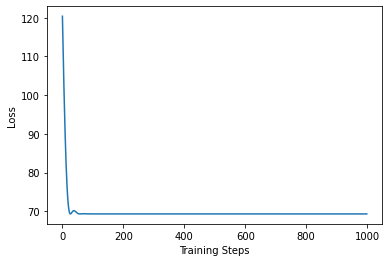

In [53]:
import matplotlib.pyplot as plt
plt.plot(loss_data_numpy)
plt.ylabel('Loss')
plt.xlabel('Training Steps')
plt.show()

In [46]:
theta_coin_toss

<TransformedVariable: name=theta_coin_toss, dtype=float32, shape=[], fn="soft_clip", numpy=0.5>

In [47]:
## See after 1000 steps - the most probable value of theta that is achieved is 0.5 
## Note we started form 0.4 as our initial guess 

In [48]:
#
tf.reduce_mean(tf.cast(coin_toss_dataset,float))

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [49]:
'''
Compare theta_coin_toss and tf.reduce_mean(tf.cast(coin_toss_dataset,float))
shows the solution has converged.
'''